In [2]:
# required for the animated 3D figures
%matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d

# Task 1
Take a closer look at the following code and also at the diagram. You see the output function of the nueron from the lecture as a plane and the data from the lecture as dots. Try to "train" the neuron manually to make better predictions yourself by adjusting the weights. You see the error function below the diagram

<IPython.core.display.Javascript object>


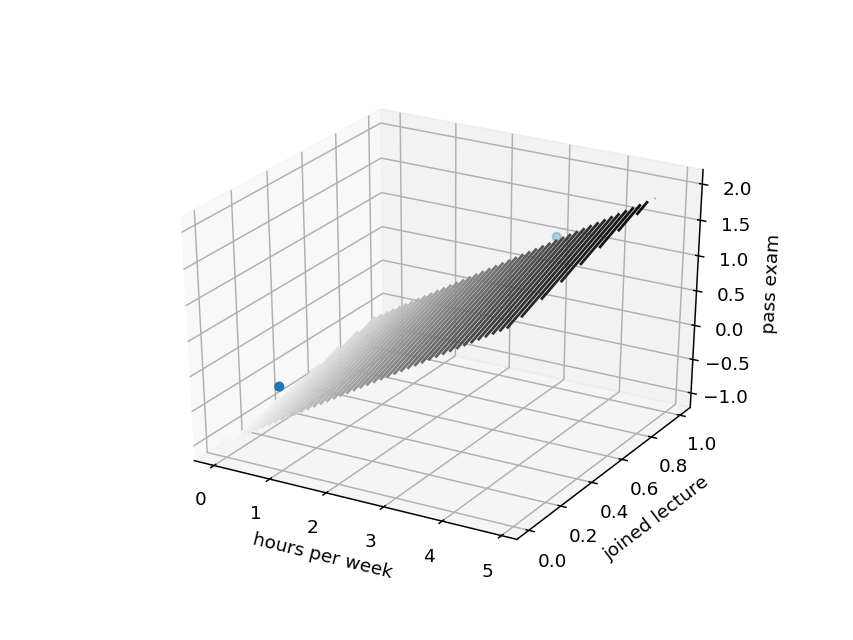

0.21241898213076751


In [69]:
# Define a range: start, end, step
x1 = np.arange(0, 5, 0.1)
x2 = np.arange(0, 1, 0.1)

# our weights
w0=-1
w1=0.5
w2=0.5

# Use the range to define a multidimensional grid
X1, X2 = np.meshgrid(x1,x2)

# f(x)
Z = w1*X1+w2*X2+w0

# The plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Z, 50, cmap='binary')
ax.scatter([3,1], [1,0], [1,0])
ax.set_xlabel('hours per week')
ax.set_ylabel('joined lecture')
ax.set_zlabel('pass exam')

# Error for the values above
error = (1-1/(1+math.exp(-(w0+w1*3+w2*1))))**2+(0-1/(1+math.exp(-(w0+w1*1+w2*0))))**2
print(error)

# Task 2
The following code uses the error function and plots it. Since w0 is just a shift of the plane, we will ignore it here and it remains 0. Try to plot the error function in a way, so that you can read values for W1 and W2 from the plot so that the error for the neuron becomes lower than 0.21486644472506417. So in contrast to task 1, we train the neuron here using the computer ;) Try the values for w1 and w2 you found here and check the result in the code of Task 1

<IPython.core.display.Javascript object>


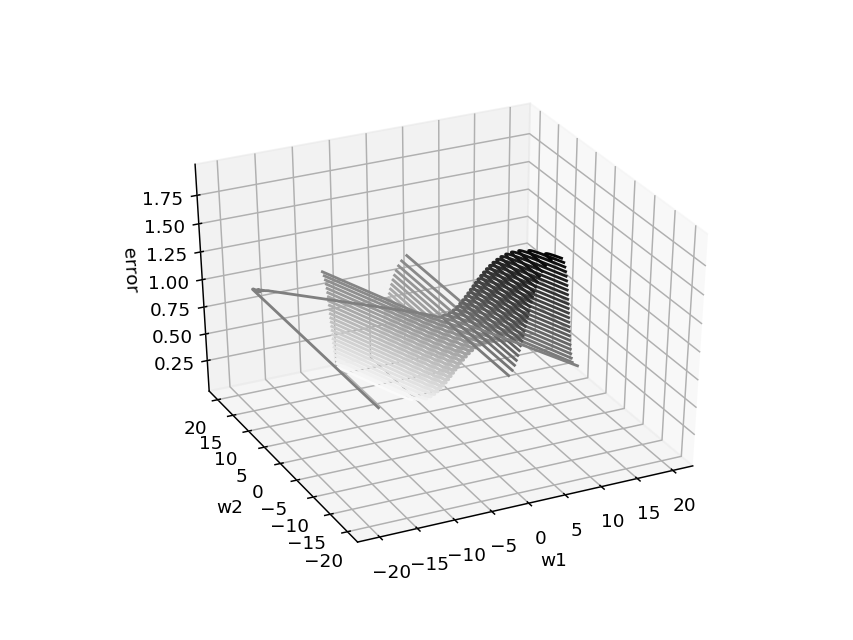

Text(0.5, 0, 'error')

In [60]:
# Well, lets take a look at the function we want to minimize
# Define a range: start, end, step
w0_ = 0 #we push it up/down manually later
w1_ = np.arange(-20, 20, 0.1)
w2_ = np.arange(-20, 20, 0.1)

# Use the range to define a multidimensional grid
W1, W2 = np.meshgrid(w1_,w2_)

# f(x)
def error_(w0,w1,w2):
    return (1-1/(1+math.exp(-(w0+w1*3+w2*1))))**2+(w0-1/(1+math.exp(-(0+w1*1+w2*0))))**2
error = np.vectorize(error_)

Z = error(w0_,W1,W2)

# The plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(W1, W2, Z, 50, cmap='binary')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('error')

# Task 3: parameter optimization
Optimize the parameter w2 for the network. How did this influence the error function?
Wouldnt it be more precise to recalculate the error function with the already optimized paramater for w1?
What is the benefit of training the parameters without recalculationg the error function?

In [65]:
# Parameter Optimization for w1

eta=0.5 # Learning rate

# our weights
w0=-1
w1=0.5
w2=0.5

# forward pass 3-1-1
net_w1=w0+w1*3+w2*1

# the partial differentiates
d_error_by_d_out_w1 = (1/(1+math.exp(-net_w1)))-1
d_out_by_d_net_w1 = (1/(1+math.exp(-net_w1)))*(1-(1/(1+math.exp(-net_w1))))
d_net_b_d_w1 = 3

# the partial differetiate for the parameter
d_error_by_d_w1 = d_error_by_d_out_w1 * d_out_by_d_net_w1 * d_net_b_d_w1

# optimized parameter
w1plus= w1 - eta * d_error_by_d_w1

print("w1 plus: "+ str(w1plus))


# Parameter Optimization for w2

# Parameter Optimization for w2 with batch size 1


w1 plus: 0.51586312783528
w2 plus: 0.5052877092784267
w2 plus mit batch size 1: 0.5039172842928317
